In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Packages

In [3]:
!pip install osmnx
!pip install folium
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.9 MB/s 
     |████████████████████████████████| 1.0 MB 28.5 MB/s 
     |████████████████████████████████| 6.3 MB 45.8 MB/s 
     |████████████████████████████████| 11.2 MB 50.6 MB/s 
     |████████████████████████████████| 1.0 MB 74.1 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 16.7 MB 53.2 MB/s 
     |████████████████████████████████| 965 kB 60.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Task 5 Route Analysis

In [2]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt
import folium
import collections
import geopandas as gpd
import numpy as np
import re
import matplotlib.pyplot as plt

In [20]:
json_path = '/content/drive/MyDrive/Colab Notebooks/AI6128_Project2/porto/porto.geojson'
route_path = '/content/drive/MyDrive/Colab Notebooks/AI6128_Project2/porto/match_result.csv'
output_dir= '/content/drive/MyDrive/Colab Notebooks/AI6128_Project2/output/'
edge_path = '/content/drive/MyDrive/Colab Notebooks/AI6128_Project2/data/edges.shp'

In [21]:
# import results trajectory dataset from task 3
df = pd.read_csv(route_path, engine='python')
df = pd.DataFrame(df)
df = df.loc[df['mgeom'].str.contains("LINESTRING")]
df = df.loc[df['mgeom'] != 'LINESTRING()']
df.dropna(axis=0, how='any', inplace=True, subset=None)
df

,t_number,cpath,opath,offset,length,spdist,mgeom
0,1,"[483, 1061, 481, 238, 3416, 8462, 3415, 235, 3...","[483, 483, 1061, 1061, 481, 481, 238, 238, 235...","[0.005765244498603186, 0.0059112713802073075, ...","[0.007070636992543766, 0.007070636992543766, 0...","[0.0, 0.0001460268816041218, 0.004467393434995...","LINESTRING(-8.6186233 41.141456,-8.6183463 41...."
1,2,"[5377, 10376, 10383, 10378, 1953, 5463, 265, 5...","[5377, 5377, 1953, 5463, 265, 5425, 5437, 5427...","[0.001679679404078842, 0.002184332192417357, 0...","[0.0031900600126394565, 0.0031900600126394565,...","[0.0, 0.0005046527883385151, 0.001860065032457...","LINESTRING(-8.6398592 41.159752,-8.6400962 41...."
2,3,"[7423, 243, 7422, 8777, 7707, 7829, 8474, 1061...","[7423, 243, 7422, 7707, 8474, 8474, 1061, 1061...","[0.0008091434637423619, 0.0, 0.000212557992085...","[0.0008971800885218301, 0.0009064409168658702,...","[0.0, 8.803662477946817e-05, 0.001118998908951...","LINESTRING(-8.6135064 41.141371,-8.6134714 41...."
3,4,"[5968, 396, 398, 386, 11052, 406, 1080, 4696, ...","[5968, 5968, 5968, 5968, 5968, 5968, 5968, 596...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00106030...","[0.008715180515387088, 0.008715180515387088, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00106030...","LINESTRING(-8.5747537 41.151899,-8.5747993 41...."
4,5,"[9655, 9653, 7636, 9658, 2635, 2638, 2639, 566...","[9655, 9655, 9653, 2638, 2639, 8327, 268, 262,...","[0.0008438441597467526, 0.0008438441597467526,...","[0.0008438441597467525, 0.0008438441597467525,...","[0.0, 0.0, 0.0005535986566614134, 0.0016052897...","LINESTRING(-8.6457599 41.180528,-8.645788 41.1..."
...,...,...,...,...,...,...,...
992,993,"[7918, 577, 1298, 10363, 1874, 1875, 1870, 186...","[7918, 7918, 10363, 10363, 10363, 10363, 10363...","[0.0006089634144608625, 0.0007258475366292807,...","[0.001357279211406508, 0.001357279211406508, 0...","[0.0, 0.00011688412216841822, 0.00123158887654...","LINESTRING(-8.6040713 41.161172,-8.6038989 41...."
993,994,"[7305, 7302, 985, 8736, 862, 6995, 763, 110, 1...","[7305, 7305, 7305, 7305, 7305, 7305, 7302, 730...","[0.0014609066296139626, 0.0014909568356690469,...","[0.002308366621743141, 0.002308366621743141, 0...","[0.0, 3.0050206055084235e-05, 6.24991812785214...","LINESTRING(-8.5969744 41.150705,-8.596712 41.1..."
995,996,"[10256, 7984, 10273, 6412, 931, 939, 927, 9691...","[10256, 7984, 10273, 939, 939, 9691, 9691, 835...","[0.0, 0.00034433035741474836, 0.00094745105385...","[6.0959412725475944e-05, 0.0007725115382481211...","[0.0, 0.0004052897701402243, 0.001375632234691...","LINESTRING(-8.6111092 41.143076,-8.6110491 41...."
997,998,"[10260, 5650, 10171, 10172, 5653, 5651, 5650, ...","[10260, 10260, 5650, 5650, 10171, 5651, 10261,...","[0.0015853167911345591, 0.001681661398678613, ...","[0.0018585369014060833, 0.0018585369014060833,...","[0.0, 9.634460754405385e-05, 0.000280164320253...","LINESTRING(-8.5861028 41.148559,-8.586095 41.1..."


### (1) 5 Roads Travel Most Often

In [38]:
road_segments = df['cpath'].tolist()
road_segments = ",".join(road_segments).split(",")

for i in range(len(road_segments)):
  road_segments[i] = road_segments[i].replace(' ','')
  road_segments[i] = road_segments[i].replace('[','')
  road_segments[i] = road_segments[i].replace(']','')

  if road_segments[i]:
    road_segments[i] = int(road_segments[i])

In [39]:
counter = collections.Counter(road_segments)
result = counter.most_common(5)
result = [int(i[0]) for i in result]
print("5 FIDs of the road segments which are traversed most often:")
print(result)

5 FIDs of the road segments which are traversed most often:
[2318, 6745, 2760, 2134, 2802]


In [40]:
mgeoms = gpd.read_file(edge_path, index_col='fid')['geometry']
mgeoms = mgeoms[mgeoms.index.isin(result)]
mgeoms.head()

2134    LINESTRING (-8.60019 41.17589, -8.60015 41.176...
2318    LINESTRING (-8.59924 41.17793, -8.59905 41.17831)
2760    LINESTRING (-8.60515 41.18023, -8.60546 41.179...
2802    LINESTRING (-8.59960 41.17725, -8.59927 41.17788)
6745    LINESTRING (-8.61122 41.14942, -8.61122 41.149...
Name: geometry, dtype: geometry

In [41]:
coordinates = [np.array([list(i) for i in mgeoms.iloc[j].coords]) for j in range(len(mgeoms.index))]

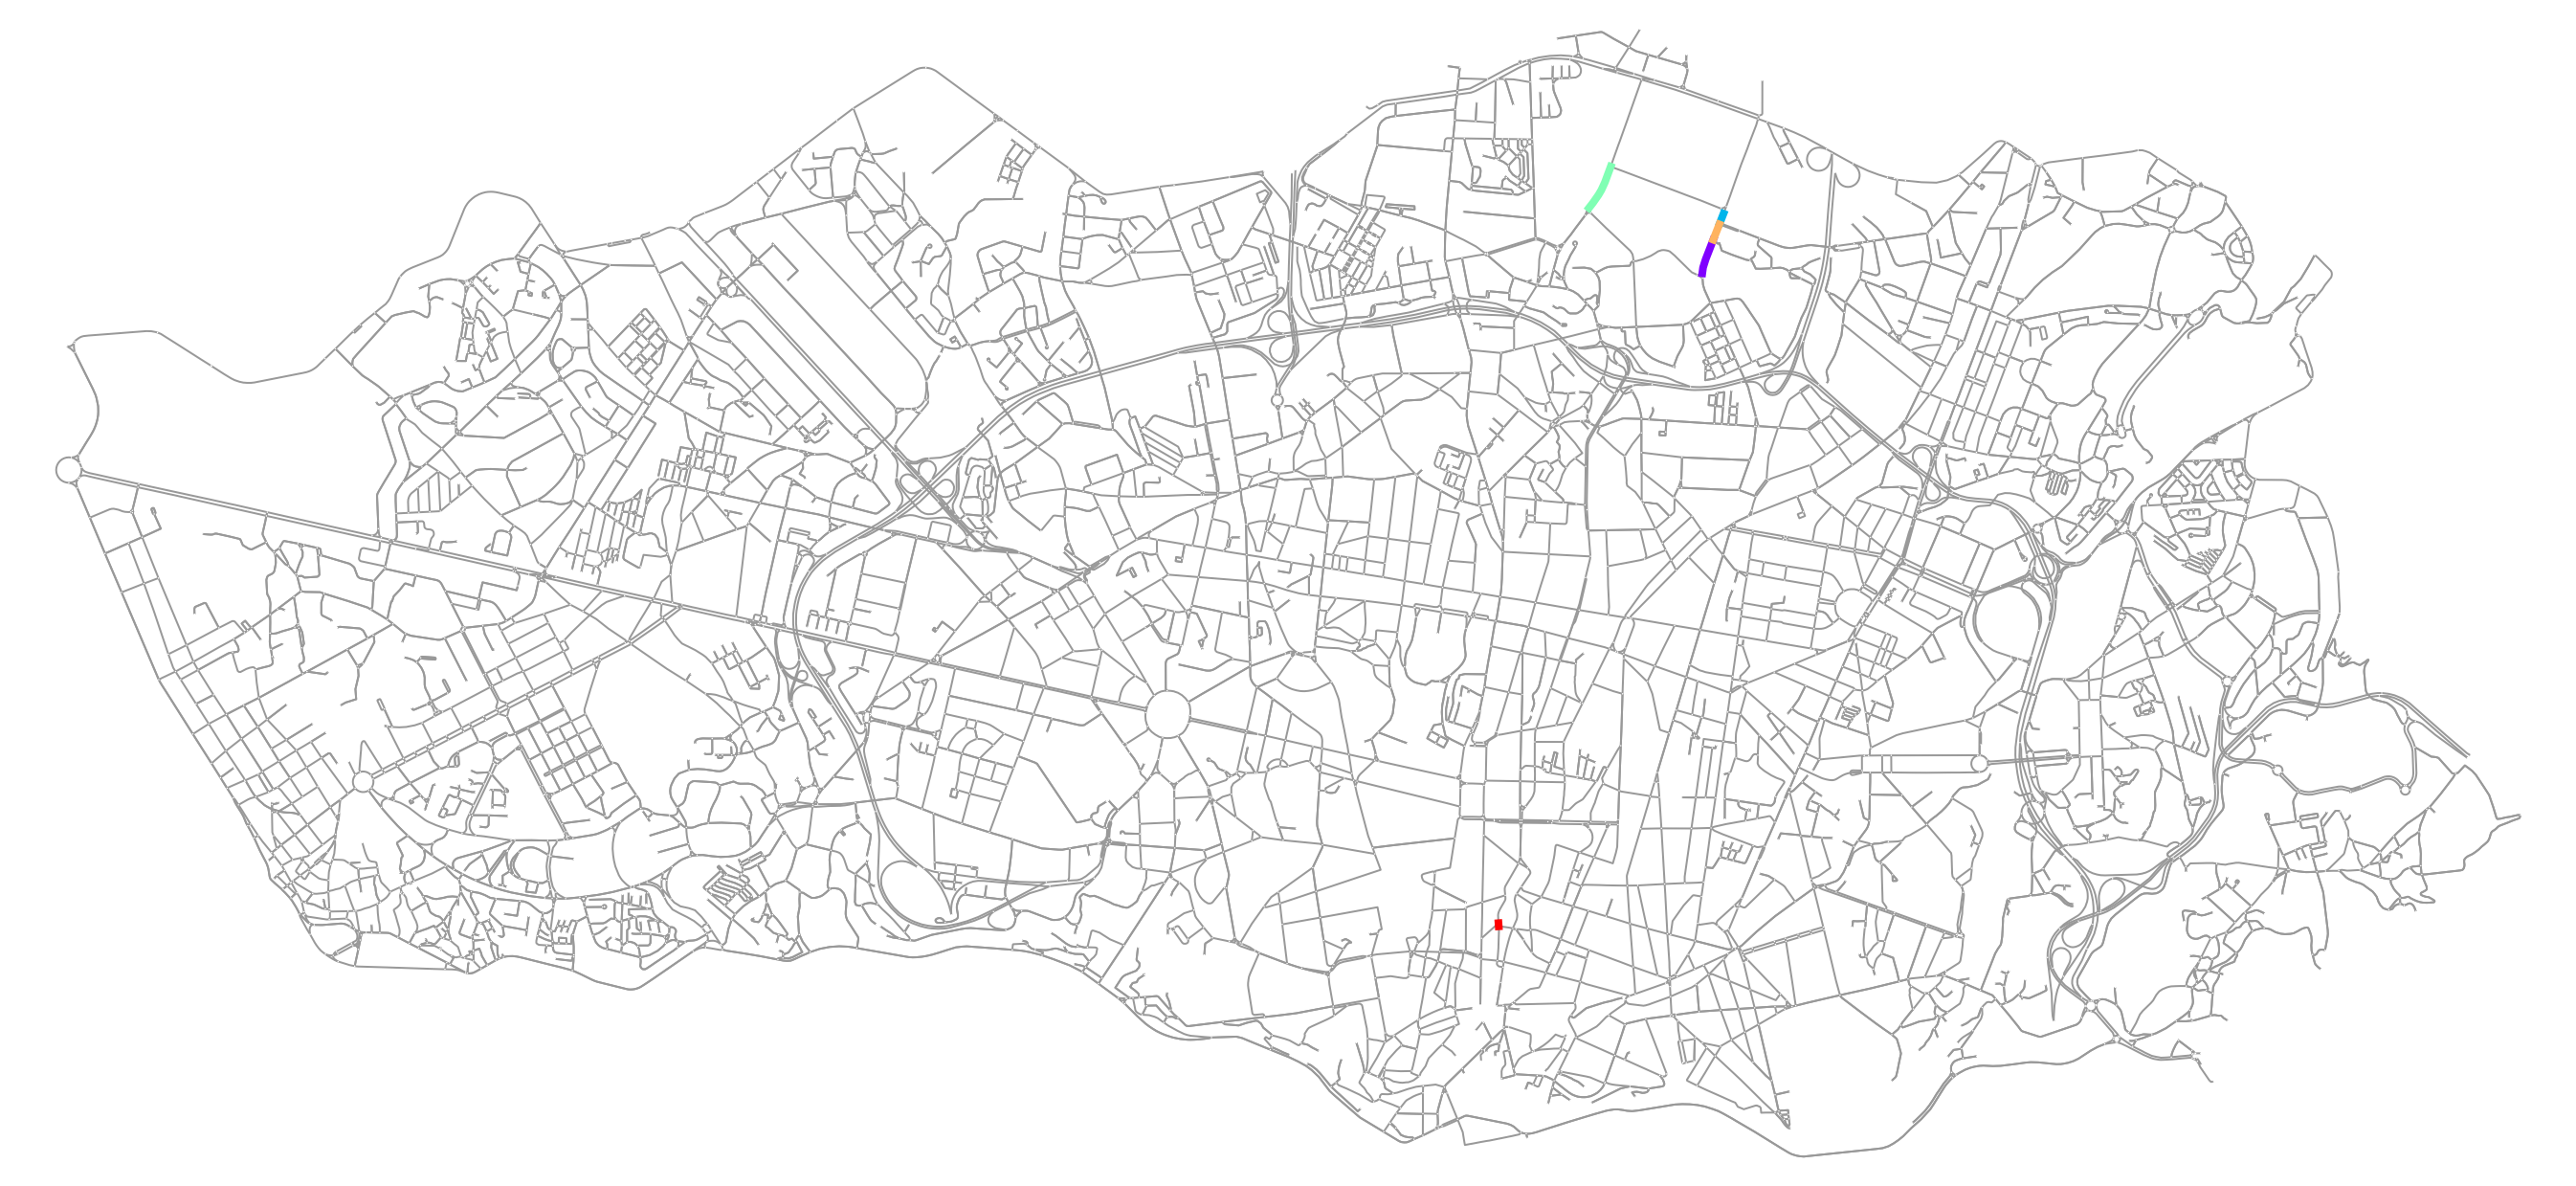

In [42]:
road_network=ox.graph_from_place('Porto Portugal', network_type='drive')

fig, ax = ox.plot_graph(road_network, node_size=2, show=False, close=False, figsize=(48, 48), bgcolor = '#FFFFFF', edge_linewidth=2)

color_list = ['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

for idx, c in enumerate(color_list):
    plt.plot(*coordinates[idx].T, color=c, linewidth=8)

plt.show()


### (2) 5 Roads Largest Travelling Time

In [27]:
road_segments = df['opath'].tolist()
road_segments = ",".join(road_segments).split(",")

for i in range(len(road_segments)):
  road_segments[i] = road_segments[i].replace(' ','')
  road_segments[i] = road_segments[i].replace('[','')
  road_segments[i] = road_segments[i].replace(']','')

  if road_segments[i]:
    road_segments[i] = int(road_segments[i])

In [28]:
counter = collections.Counter(road_segments)
result = counter.most_common(5)
result = [int(i[0]) for i in result]
print("5 FIDs of the road segments with largest travelling time:")
print(result)

5 FIDs of the road segments with largest travelling time:
[5650, 940, 134, 3453, 835]


In [32]:
mgeoms = gpd.read_file(edge_path, index_col='fid')['geometry']
mgeoms = mgeoms[mgeoms.index.isin(result)]
mgeoms.head()

134     LINESTRING (-8.62484 41.17323, -8.62544 41.173...
835     LINESTRING (-8.60493 41.14403, -8.60597 41.144...
940     LINESTRING (-8.60866 41.14740, -8.60881 41.147...
3453    LINESTRING (-8.63442 41.15246, -8.63460 41.152...
5650    LINESTRING (-8.58610 41.14883, -8.58607 41.148...
Name: geometry, dtype: geometry

In [33]:
coordinates = [np.array([list(i) for i in edges.iloc[j].coords]) for j in range(len(mgeoms.index))]

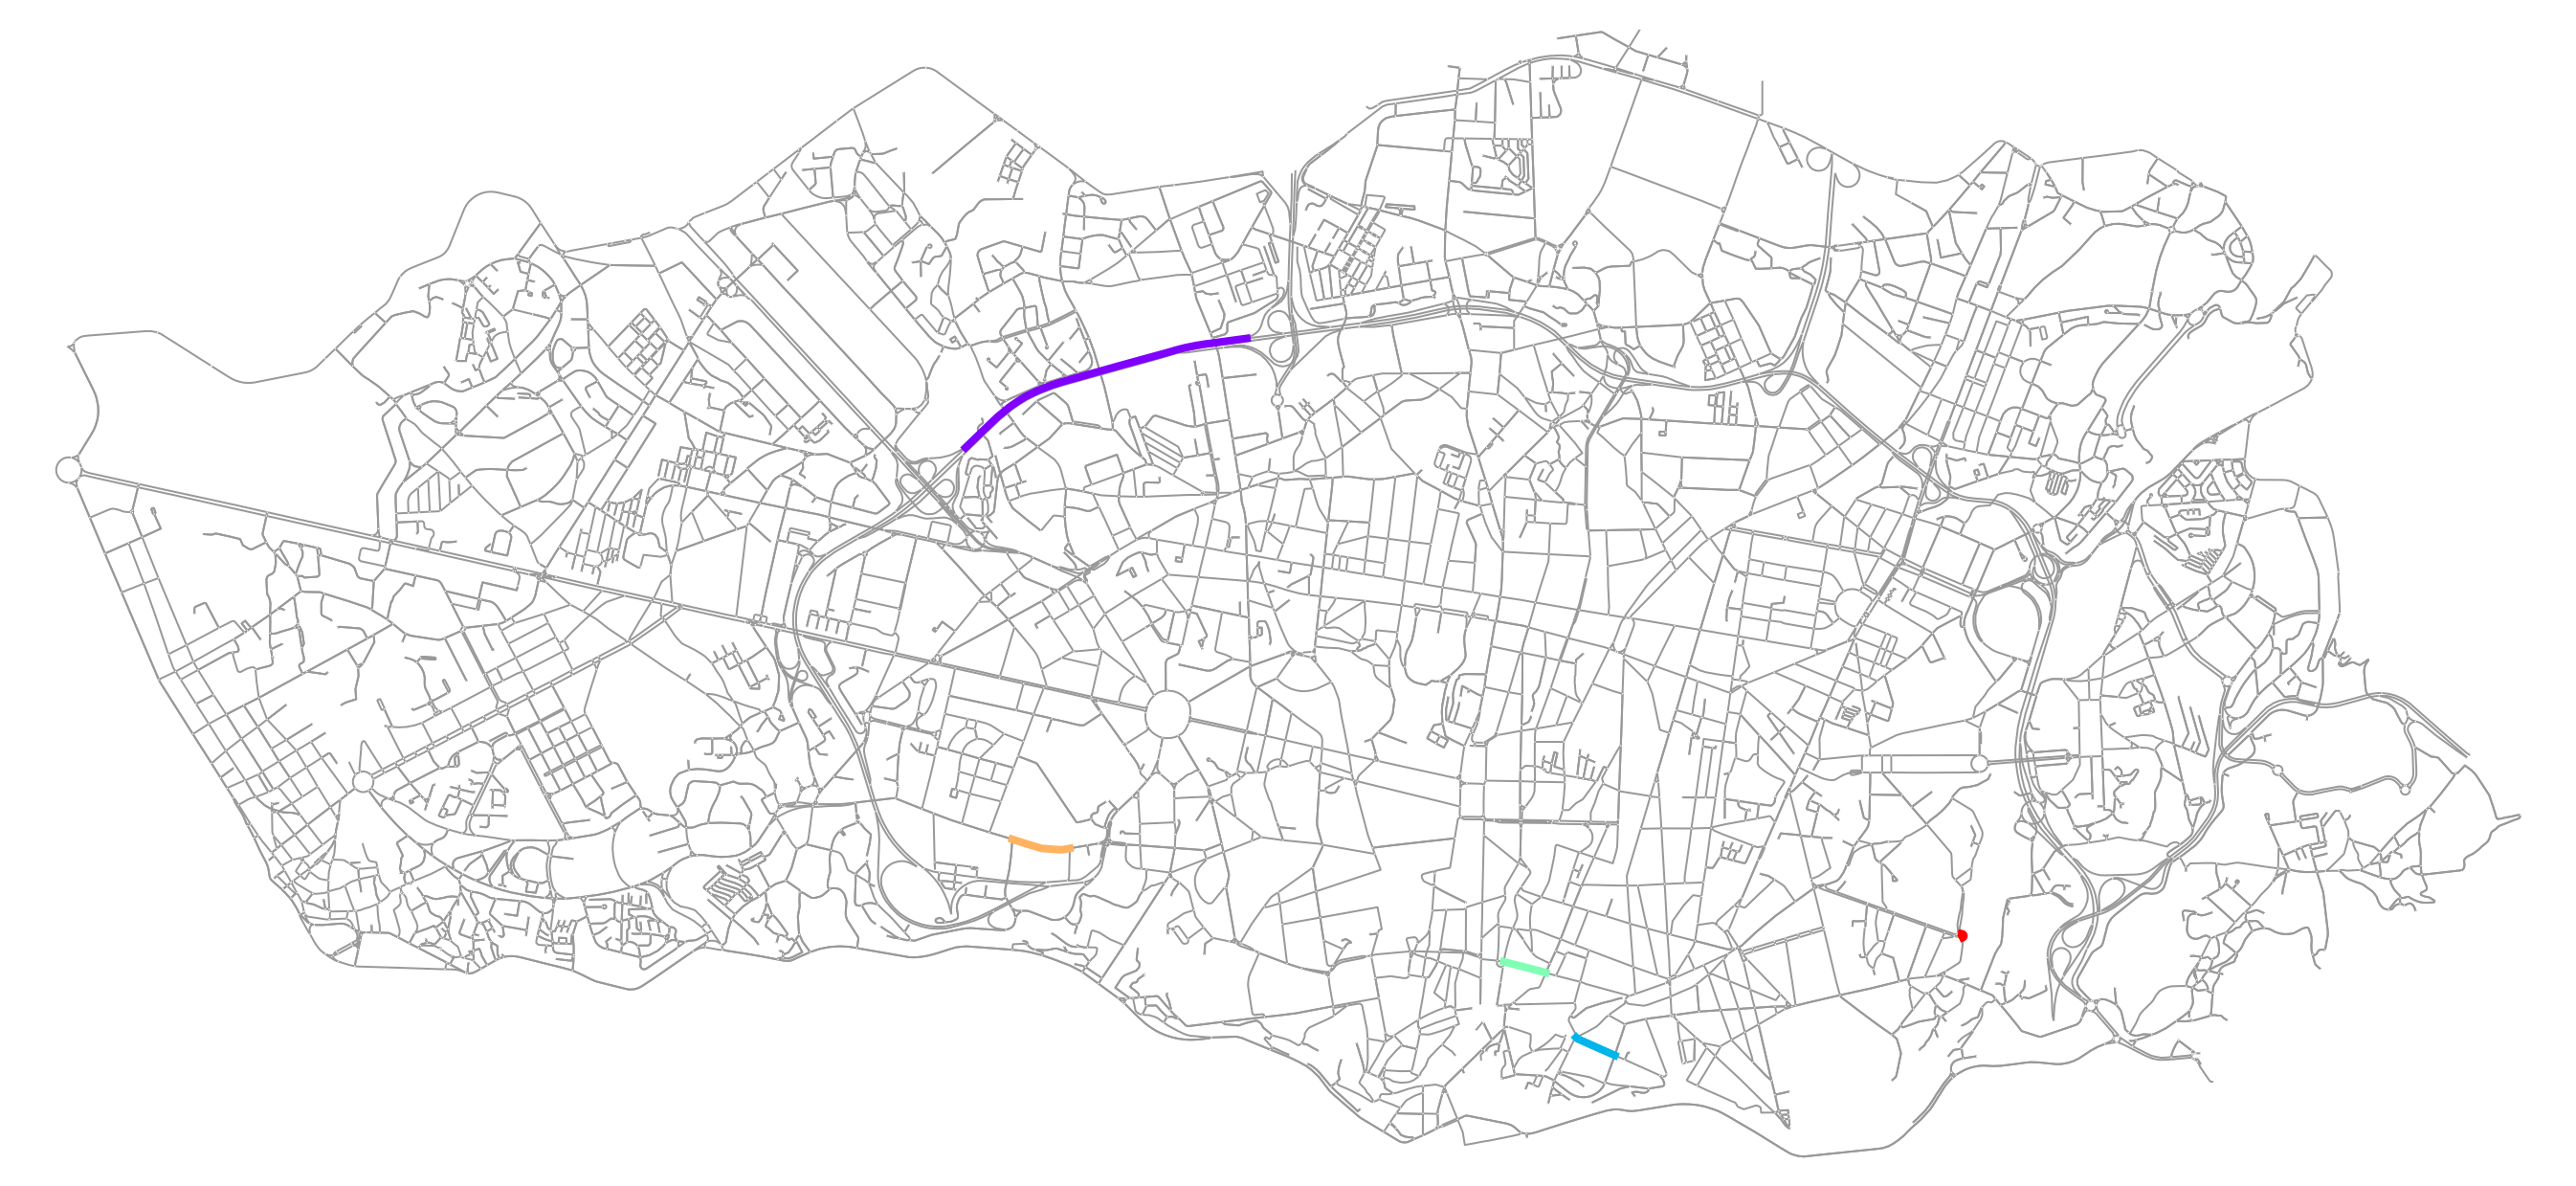

In [34]:
road_network=ox.graph_from_place('Porto Portugal', network_type='drive')

fig, ax = ox.plot_graph(road_network, node_size=2, show=False, close=False, figsize=(48, 48), bgcolor = '#FFFFFF', edge_linewidth=2)

color_list = ['#8000ff', '#00b5eb', '#80ffb4', '#ffb360', '#ff0000']

for idx, c in enumerate(color_list):
    plt.plot(*coordinates[idx].T, color=c, linewidth=8)
plt.show()